# <b><h1>External Experimentation</h1></b>

This is an extension of the `heart_disease_project_2.ipynb` notebook which you can see <a href="https://github.com/Ale-Cie/heart_disease_project/blob/main/heart_disease_project_2.ipynb">here</a>. In this one however I will focus solely on training multiple networks and seeing the results. My goal is to find the best replacement for the baseline network that looks like the graph below:

<img src="https://aleksanderc.pythonanywhere.com/static/images/Projects/Notebooks/hdp_blueprint.png" style="width: 400px">

I will train it shortly, just so I can compare to the rest later. First things first - I have to import the tools.

## Importing the tools and setting up the data

Just like in the origin notebook we have to import all the tools and then divide the data into train and test sets

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split

import funcs

warnings.filterwarnings("ignore")
layers = tf.keras.layers

In [2]:
funcs.set_seed()

df = pd.read_csv("heart_cleveland_upload.csv")

X = df.drop(["condition"], axis= 1)
y = df["condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape = [X_train.shape[1]]
data_sets = [X_train, X_test, y_train, y_test]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor= "val_loss",
    patience= 5,
    restore_best_weights= True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor= "val_loss",
    factor= 0.1,
    min_lr= 0.001,
    patience= 5
)

callbacks = [early_stopping, reduce_lr]

## Model 1 - The baseline

It's time to recreate the baseline model and compare it at the end to all others

In [3]:
funcs.set_seed()

model_1 = keras.Sequential([
   layers.BatchNormalization(
      input_shape= input_shape,
      ),
   layers.Dense(
       units= 10,
       activation= "relu",
   ),
   layers.Dropout(
       rate= 0.3,
   ),
   layers.Dense(
       units= 1,
       activation= "sigmoid",
   )
])

model_1_params = (10, 0.3)

model_1.compile(
    optimizer= "adam",
    loss= "binary_crossentropy",
    metrics= ["binary_accuracy"]
)

model_1.fit(
    x= X_train,
    y= y_train,
    validation_split= 0.25,
    batch_size= 20,
    epochs= 200,
    callbacks= callbacks,
    verbose= False
)

score_1 = funcs.score_model(
    predictions= model_1.predict(
        x= X_test,
        batch_size= 20,
        verbose= True,
    ),
    true_values= y_test
)

funcs.close_session()

print("Model_1 accuracy score is: %.3f" %(score_1 * 100) + "%")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-08-16 19:06:24.302318: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 5ms/step
Model_1 accuracy score is: 84.444%


## Round #2 - Expanding the network

Just like in the `heart_disease_project_2.ipynb` the first network performed quite well, but it doesn't change the fact that I can still try and get a better result. Firstly I'll start with experimenting with the current look of the network. We will up the number of units for the first hidden layer from 10 to 13 (the number of features). Maybe we will experiment with some more numbers. 

At a later stage I will add some more layers to the network and see if they boost performance in any significant way. Let's begin!

### Model 2 - More units:

In [4]:
funcs.set_seed()

model_2 = keras.Sequential([
    layers.BatchNormalization(
        input_shape = input_shape,
    ),
    layers.Dense(
        units= 13,
        activation= "relu",
    ),
    layers.Dropout(
        rate= 0.3,
    ),
    layers.Dense(
        units= 1,
        activation= "sigmoid",
    )
])

model_2_params = (13, 0.3)

model_2.compile(
    optimizer= "adam",
    loss= "binary_crossentropy",
    metrics= ["binary_accuracy"]
)

model_2.fit(
    x= X_train,
    y= y_train,
    validation_split= 0.25,
    batch_size= 20,
    epochs= 200,
    callbacks= callbacks,
    verbose= False,
    
)

score_2 = funcs.score_model(
    predictions= model_2.predict(
        x= X_test,
        batch_size= 20,
        verbose= True
    ),
    true_values= y_test
)

funcs.close_session()

print("Model_2 accuracy score is: %.3f" %(score_2 * 100) + "%")

5/5 [==============================] - 0s 5ms/step
Model_2 accuracy score is: 82.222%


This left us with a model that performed worse than the first iteration... Not good. Maybe experimenting more with the units could help, but for now let's add another Dense Layer and see how that does.

### Model 3 - A new layer:

In [5]:
funcs.set_seed()

model_3 = keras.Sequential([
    layers.BatchNormalization(
        input_shape= input_shape,
    ),
    layers.Dense(
        units= 13,
        activation= "relu",
    ),
    layers.Dense(
        units= 10,
        activation= "relu",
    ),
    layers.Dropout(
        rate= 0.3,
    ),
    layers.Dense(
        units= 1,
        activation= "sigmoid",
    )
])

model_3_params = (13, 10, 0.3)

model_3.compile(
    optimizer= "adam",
    loss= "binary_crossentropy",
    metrics= ["binary_accuracy"],
)

model_3.fit(
    x= X_train,
    y= y_train,
    validation_split= 0.25,
    batch_size= 20,
    epochs= 200,
    callbacks= callbacks,
    verbose = False
)

score_3 = funcs.score_model(
    predictions= model_3.predict(
        x= X_test,
        batch_size= 20,
        verbose= True
    ),
    true_values= y_test
)

funcs.close_session()

print("Model_3 accuracy score is: %.3f" %(score_3 * 100) + "%")

5/5 [==============================] - 0s 4ms/step
Model_3 accuracy score is: 77.778%


#### Model 3.1 - Changing the rates:

Originally `model_3` had units1 set to 13, units2 to 10 and rate1 to 0.3. Just like before we will try 5 different combinations close to the original settings

In [6]:
funcs.set_seed()
funcs.close_session()

net_3_params = [
    (13, 10, 0.35),
    (13, 10, 0.4),
    (13, 10, 0.45),
    (13, 10, 0.25),
    (13, 10, 0.2)
]

network_3_dict = funcs.network_dict(
    input_shape= input_shape,
    params_list= net_3_params,
    callbacks= callbacks,
    data= data_sets,
    iteration= 3
)

for key, value in network_3_dict.items():
    print(f"{key} accuracy equals: {value[1]}%")

Scoring model 1/5
5/5 [==============================] - 0s 4ms/step
Scoring model 2/5
5/5 [==============================] - 0s 4ms/step
Scoring model 3/5
5/5 [==============================] - 0s 4ms/step
Scoring model 4/5
5/5 [==============================] - 0s 4ms/step
Scoring model 5/5
5/5 [==============================] - 0s 4ms/step
Done scoring!
Model_1 accuracy equals: 77.77777777777779%
Model_2 accuracy equals: 77.77777777777779%
Model_3 accuracy equals: 80.0%
Model_4 accuracy equals: 80.0%
Model_5 accuracy equals: 77.77777777777779%


Well that's a great score for the third set of parameters! I think we will stick with it for any further testing. Let's now attempt to change the structure of the network a little bit. Let's make it look like this:

<img src="https://aleksanderc.pythonanywhere.com/static/images/Projects/Notebooks/hdp_blueprint_2.png" style="width: 450px"/>

That's a long picture, but the point is I will mix the structure up by adding a new `BatchNormalization()` layer and a few new Dense and Dropout layers.

### Model 4 - A mixup:

In [7]:
funcs.set_seed()

model_4 = keras.Sequential([
    layers.BatchNormalization(
        input_shape= input_shape,
    ),
    layers.Dense(
        units= 13,
        activation= "relu",
    ),
    layers.Dropout(
        rate= 0.3,
    ),
    layers.BatchNormalization(
    ),
    layers.Dense(
        units= 10,
        activation= "relu",
    ),
    layers.Dropout(
        rate= 0.2,
    ),
    layers.Dense(
        units= 7,
        activation= "relu",
    ),
    layers.Dropout(
        rate= 0.3,
    ),
    layers.Dense(
        units= 1,
        activation= "sigmoid",
    )
])

model_4_params = (13, 10, 7, 0.3, 0.2, 0.3)

model_4.compile(
    optimizer= "adam",
    loss= "binary_crossentropy",
    metrics= ["binary_accuracy"]
)

model_4.fit(
    x= X_train,
    y= y_train,
    validation_split= 0.25,
    batch_size= 20,
    epochs= 200,
    callbacks= callbacks,
    verbose= False
)

score_4 = funcs.score_model(
    predictions= model_4.predict(
        x= X_test,
        batch_size= 20
    ),
    true_values= y_test
)

funcs.close_session()

print("Model_4 accuracy score is: %.3f" %(score_4 * 100) + "%")

5/5 [==============================] - 0s 7ms/step
Model_4 accuracy score is: 80.000%


Okay, I have to admit something - I though I had it all figured out. I made predictions on this setup of layers earlier, before making this notebook and I hate to admit it, but `model_4` did worse than that for whatever reason. It originally scored at 77.778 % and my opinion was to scrap it. However now that we have such a close match to the baseline I think I should train this network with different units and rate values...

#### Model 4.1 - Multiple takes on units and rates

In [8]:
funcs.set_seed()
funcs.close_session()

net_4_params = [
    (13, 10, 7, 0.3, 0.3, 0.3), # This is the baseline for this network
    (13, 10, 7, 0.3, 0.3, 0.2),
    (13, 10, 7, 0.2, 0.3, 0.3),
    (13, 10, 7, 0.4, 0.3, 0.2),
    (13, 10, 7, 0.4, 0.3, 0.3)
]

network_4_dict = funcs.network_dict(
    input_shape= input_shape,
    params_list= net_4_params,
    callbacks= callbacks,
    data= data_sets,
    iteration= 4
)

for key, value in network_4_dict.items():
    print("{} accuracy equals: {:.3f}%".format(key, value[1]))

Scoring model 1/5
5/5 [==============================] - 0s 8ms/step
Scoring model 2/5
5/5 [==============================] - 0s 10ms/step
Scoring model 3/5
5/5 [==============================] - 0s 8ms/step
Scoring model 4/5
5/5 [==============================] - 0s 8ms/step
Scoring model 5/5
5/5 [==============================] - 0s 9ms/step
Done scoring!
Model_1 accuracy equals: 80.000%
Model_2 accuracy equals: 80.000%
Model_3 accuracy equals: 80.000%
Model_4 accuracy equals: 81.111%
Model_5 accuracy equals: 80.000%


That's consistency if I've ever seen one. However 4th set of parameters did best, and better than the stock model at that!

## Summary of Experimentation

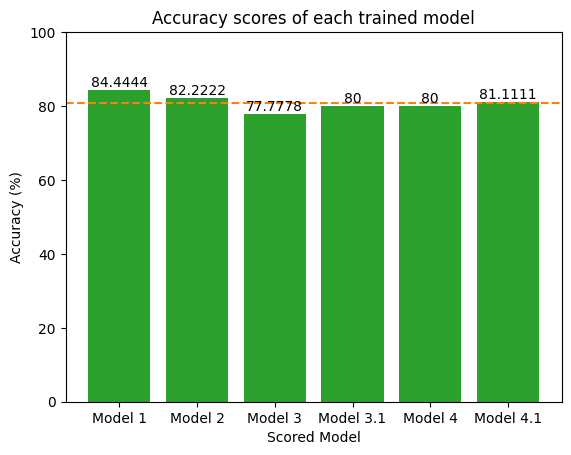

In [9]:
scores_dict = {
    "Model 1": (score_1 * 100),
    "Model 2": (score_2 * 100),
    "Model 3": (score_3 * 100),
    "Model 3.1": np.max([(value[1]) for value in network_3_dict.values()]),
    "Model 4": (score_4 * 100),
    "Model 4.1": np.max([(value[1]) for value in network_4_dict.values()])
}

fig, ax = plt.subplots()
ax.bar(
    x= [key for key in scores_dict.keys()],
    height= [score for score in scores_dict.values()],
    color= "tab:green"
)
ax.set_title("Accuracy scores of each trained model")
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Scored Model")
ax.set_ylim(bottom=0, top=100)
plt.axhline(y=np.mean([value for value in scores_dict.values()]), color="tab:orange", linestyle="--", label=f"{np.mean([value for value in scores_dict.values()])}")

for container in ax.containers:
    ax.bar_label(container)



This simplistic graph shows us that the mean value (dashed in orange) was around 80%, so we can clearly rule out `model_3`, `model_3_1` and `model_4`. Since I think it will be best to focus on only three models in the <a href="https://github.com/Ale-Cie/heart_disease_project/blob/main/heart_disease_project_2.ipynb">original notebook</a> I will carry over networks listed below. 

I know we should probably explore some more metrics like ROC curve and AUC. Maybe some heatmaps and coefficients, but let's just leave it like that for now.

To sum up. We are going to carry over:
- `model_1`
- `model_2`
- `model_4_1`

Here are their parameters:

In [10]:
model_4_1_best_params = net_4_params[np.argmax([value[1] for value in network_3_dict.values()])]
print(f"Model_1 params are: {model_1_params}")
print(f"Model_2 params are: {model_2_params}")
print(f"Model_4_1 best params are: {model_4_1_best_params}")


Model_1 params are: (10, 0.3)
Model_2 params are: (13, 0.3)
Model_4_1 best params are: (13, 10, 7, 0.2, 0.3, 0.3)


In [11]:
funcs.save_network(
    model= network_4_dict["Model_4"][0],
    name= "model_v4_1"
)

funcs.save_network(
    model= model_2,
    name= "model_v2"
)

with open("./model_params.txt", "a+") as file:
    for line in [f"model_1_params: {model_1_params}\n", f"model_2_params: {model_2_params}\n", f"model_4_1_best_params: {model_4_1_best_params}\n"]:
        file.writelines(line)

That's how we've reached the end of this notebook. Back to the OG one.